Ideas:
    
- Classification: Categorie de la longueur du contenu !
- Faire d'abord nombre de mail + frequence avant longueur du contenu.

- Categorie Jour/nuit ou Heure de travail standard/Hors travail.
- regarder la même chose mais avec le taux char/word peut être qu'en fonction de la tempo les mots sont plus cours.
- Détecter les mails rajouter (outlier) voir le nombre de mail par année, le contenu etc.
- FAIRE des categories pour To_count pour une meilleure lisibilité.
- Finir par du clustering, acp, afc.... avant/après corrélation

- Pour R shiny refaire les graphe temporalité avec selection libre des années.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(style="whitegrid")

In [2]:
data = pd.read_csv('/Users/lucas/Desktop/Polytech/IG4/S7/projet_DS/mail_clean.csv')

In [3]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'DayWeek', 'Message-ID', 'Date', 'From',
       'To', 'Subject', 'X-From', 'X-To', 'X-cc', 'X-bcc', 'X-Folder',
       'X-Origin', 'X-FileName', 'content', 'user', 'Cat_1_level_1',
       'Cat_1_level_2', 'Cat_1_weight', 'Cat_2_level_1', 'Cat_2_level_2',
       'Cat_2_weight', 'Cat_3_level_1', 'Cat_3_level_2', 'Cat_3_weight',
       'Cat_4_level_1', 'Cat_4_level_2', 'Cat_4_weight', 'Cat_5_level_1',
       'Cat_5_level_2', 'Cat_5_weight', 'Cat_6_level_1', 'Cat_6_level_2',
       'Cat_6_weight', 'Cat_7_level_1', 'Cat_7_level_2', 'Cat_7_weight',
       'Cat_8_level_1', 'Cat_8_level_2', 'Cat_8_weight', 'Cat_9_level_1',
       'Cat_9_level_2', 'Cat_9_weight', 'Cat_10_level_1', 'Cat_10_level_2',
       'Cat_10_weight', 'labeled', 'Years', 'Month', 'Day', 'Hours',
       'content_char_len', 'content_char_length_category', 'content_word_len',
       'content_word_length_category', 'To_count'],
      dtype='object')

In [4]:
data.head()

,Unnamed: 0,Unnamed: 0.1,DayWeek,Message-ID,Date,From,To,Subject,X-From,X-To,...,labeled,Years,Month,Day,Hours,content_char_len,content_char_length_category,content_word_len,content_word_length_category,To_count
0,0,0,0,<18782981.1075855378110.JavaMail.evans@thyme>,2001-05-14 23:39:00,frozenset({'phillip.allen@enron.com'}),['tim.belden@enron.com'],No subject,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,...,False,2001,5,14,23,20,1,4,1,1
1,1,1,4,<15464986.1075855378456.JavaMail.evans@thyme>,2001-05-04 20:51:00,frozenset({'phillip.allen@enron.com'}),['john.lavorato@enron.com'],Re:,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,...,False,2001,5,4,20,773,2,138,2,1
2,2,2,2,<24216240.1075855687451.JavaMail.evans@thyme>,2000-10-18 10:00:00,frozenset({'phillip.allen@enron.com'}),['leah.arsdall@enron.com'],Re: test,Phillip K Allen,Leah Van Arsdall,...,False,2000,10,18,10,29,1,5,1,1
3,3,3,0,<13505866.1075863688222.JavaMail.evans@thyme>,2000-10-23 13:13:00,frozenset({'phillip.allen@enron.com'}),['randall.gay@enron.com'],No subject,Phillip K Allen,Randall L Gay,...,False,2000,10,23,13,180,1,34,1,1
4,4,4,3,<30922949.1075863688243.JavaMail.evans@thyme>,2000-08-31 12:07:00,frozenset({'phillip.allen@enron.com'}),['greg.piper@enron.com'],Re: Hello,Phillip K Allen,Greg Piper,...,False,2000,8,31,12,33,1,4,1,1


In [5]:
data[data['Years']>2008]

,Unnamed: 0,Unnamed: 0.1,DayWeek,Message-ID,Date,From,To,Subject,X-From,X-To,...,labeled,Years,Month,Day,Hours,content_char_len,content_char_length_category,content_word_len,content_word_length_category,To_count
43811,43811,43811,3,<30479403.1075859280910.JavaMail.evans@thyme>,2020-12-24 23:36:06,frozenset({'jody421@hotmail.com'}),['undisclosed.recipients@mailman.enron.com'],Tired Of Searching For Love In All The Wrong P...,JODY421@hotmail.com,Undisclosed.Recipients@mailman.enron.com,...,False,2020,12,24,23,6718,3,62,2,1
43854,43854,43854,1,<31789370.1075859282160.JavaMail.evans@thyme>,2020-12-29 20:53:46,frozenset({'jody421@hotmail.com'}),['undisclosed.recipients@mailman.enron.com'],Jennifer Lopez - Nudity,JODY421@hotmail.com,Undisclosed.Recipients@mailman.enron.com,...,False,2020,12,29,20,1868,3,114,2,1
84583,84583,84583,2,<12502918.1075861238248.JavaMail.evans@thyme>,2012-11-28 04:47:24,frozenset({'dvdnow_77395@xoip.com'}),NaN,Copy Your Favorite DVD Movies ... Great Gift I...,dvdnow_77395@xoip.com,No one,...,False,2012,11,28,4,1063,2,59,2,0
84588,84588,84588,6,<12951982.1075862555054.JavaMail.evans@thyme>,2012-11-18 16:28:05,frozenset({'dvdnow_52772@xoip.com'}),NaN,Copy Your Favorite DVD Movies !!!,dvdnow_52772@xoip.com,No one,...,False,2012,11,18,16,336,2,11,1,0


<br> 
<h3> 0 - Distribution des données</h3>

- Longueur du contenu.

<b>what is cat 1, cat 2, cat 3? explain that</b>

Text(0.5, 1.0, 'Content len distribution in term of word')

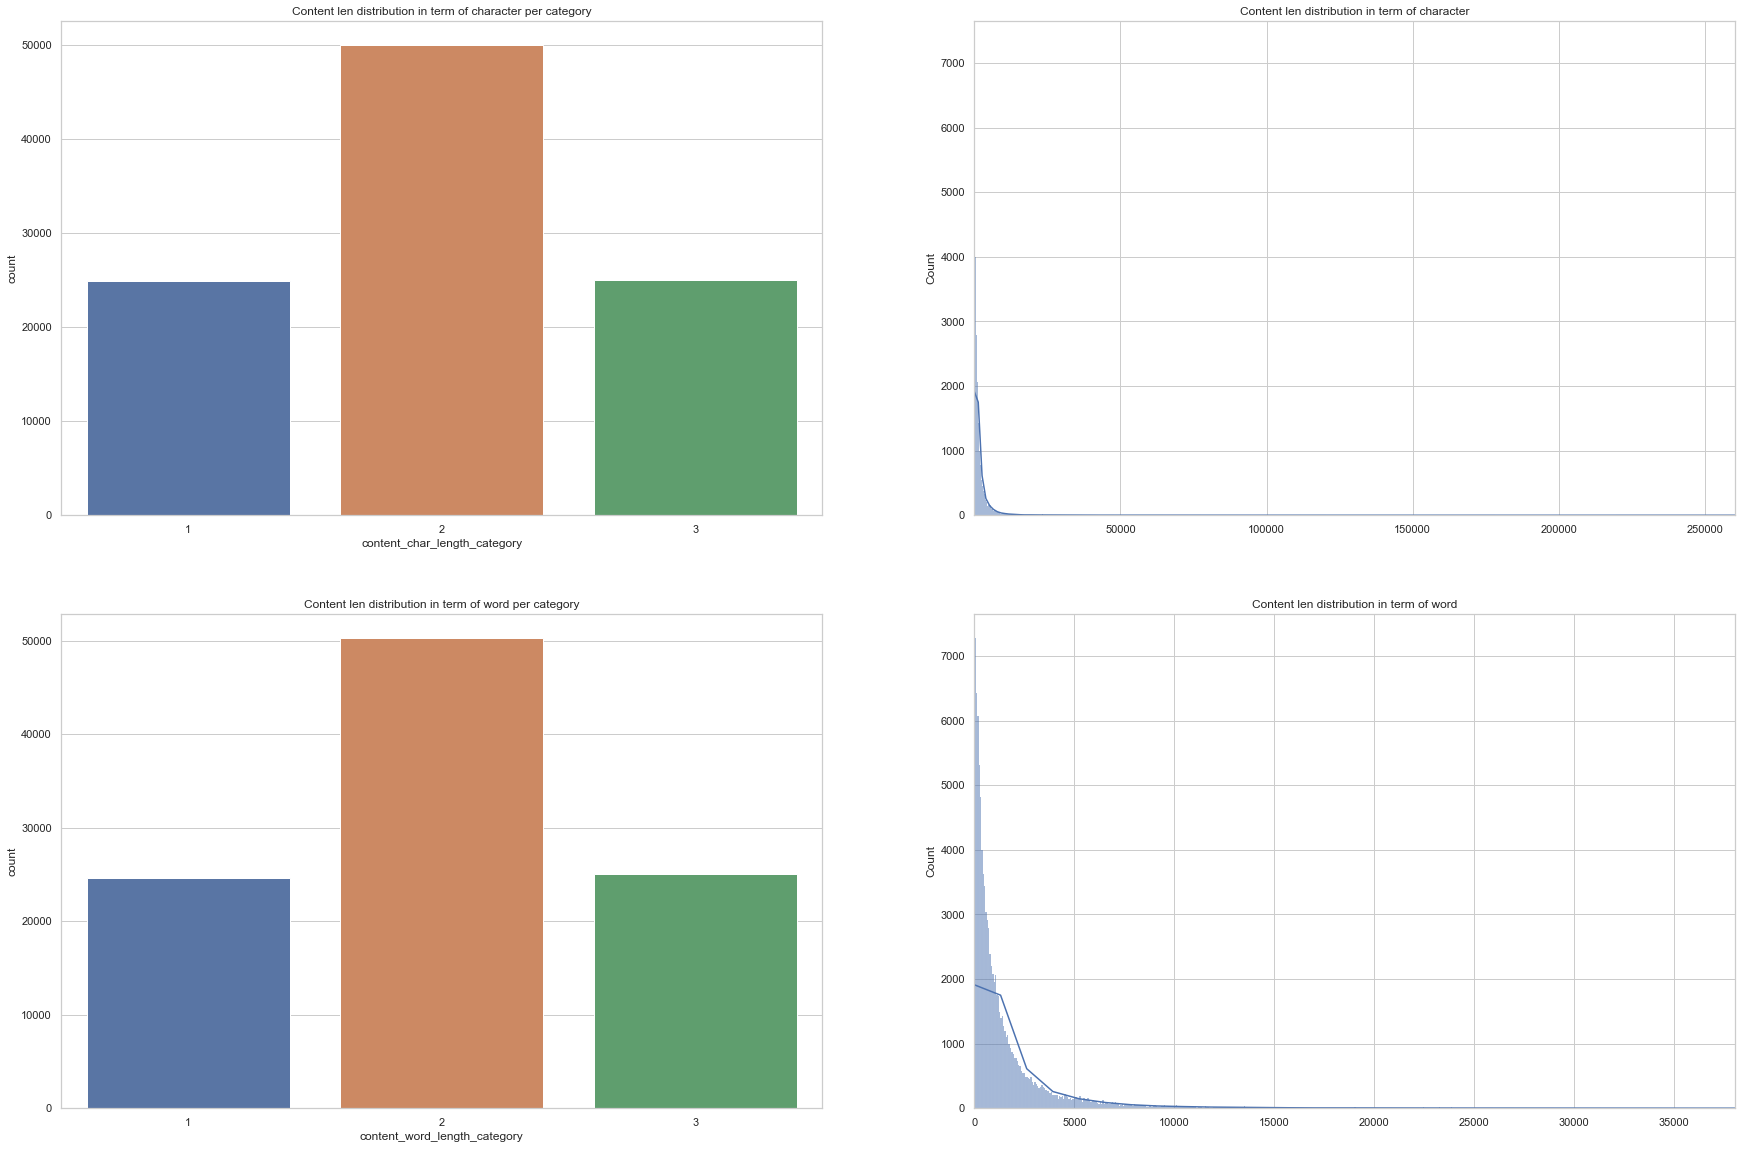

In [6]:
fig, (ax1,ax2) = plt.subplots(2,2, figsize=(30,20))

content_char_len = data['content_char_len'].values

sns.countplot(x='content_char_length_category', data=data, ax=ax1[0])
ax1[0].set_title('Content len distribution in term of character per category')

sns.histplot(content_char_len, ax=ax1[1], kde=True)
ax1[1].set_xlim([min(content_char_len), max(content_char_len)])
ax1[1].set_title('Content len distribution in term of character')


content_word_len = data['content_word_len'].values

sns.countplot(x='content_word_length_category', data=data, ax=ax2[0])
ax2[0].set_title('Content len distribution in term of word per category')

sns.histplot(content_char_len, ax=ax2[1], kde=True)
ax2[1].set_xlim([min(content_word_len), max(content_word_len)])
ax2[1].set_title('Content len distribution in term of word')

<br>

- To_count.

<b>Il faudrait diviser en plusieurs categories pour une meilleure analyse.</b>

<AxesSubplot:xlabel='To_count', ylabel='count'>

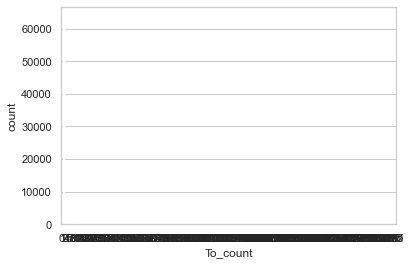

<br>

- Distribution des variables de temporalités voir data_cleaning.

<br>
<b>Distribution des receveurs et envoyeurs?</b>

<br>
<h3>I - Nombre de mail.</h3>

a - personne qui envoie le plus d'email

In [ ]:
user = data.From.unique()
counter_user = []

for i in user:
    counter = 0
    for j in data['From']:
        if  i == j:
            counter += 1
    counter_user.append(counter)
    

user_sorted = sorted(list(zip(counter_user, user)), reverse = True)[0:10]

nb_mail, user = zip(*user_sorted)

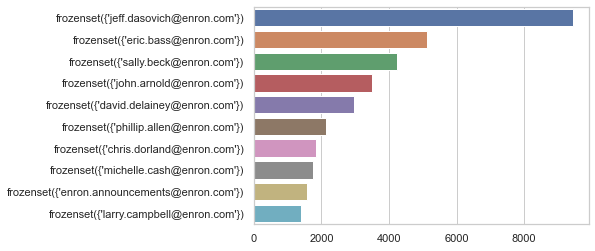

In [9]:
ax = sns.barplot(x=list(nb_mail),y=list(user))

b - en fonction des années

In [10]:
count = [1 for i in range(0,len(data.From))]


data_user_year = data[['From', 'Years']]
data_user_year['count'] = count

sum_by_year = data_user_year.groupby(['From','Years']).sum().reset_index()
print(sum_by_year)

                                              From  Years  count
0     frozenset({"'todd'.delahoussaye@enron.com"})   2002      1
1            frozenset({"carla.o'neil@enron.com"})   2002      1
2       frozenset({"earlene.o'connell@enron.com"})   2000      2
3       frozenset({"earlene.o'connell@enron.com"})   2001      4
4          frozenset({"karon.o'gorman@enron.com"})   2001      2
...                                            ...    ...    ...
6774                  frozenset({'zrzic@mail.pt'})   2001      1
6775         frozenset({'zulie.flores@enron.com'})   2001      2
6776  frozenset({'zvo2z17d0@untappedmarkets.com'})   2001      1
6777            frozenset({'zwharton@dawray.com'})   2000     18
6778            frozenset({'zwharton@dawray.com'})   2001      9

[6779 rows x 3 columns]


<ipython-input-10-c4a4fe035901>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_user_year['count'] = count


In [11]:
for index, row in sum_by_year.iterrows():
    if row['From'] not in user:
        sum_by_year.drop(index, inplace=True)
print(sum_by_year)

                                              From  Years  count
1106        frozenset({'chris.dorland@enron.com'})   1980      2
1107        frozenset({'chris.dorland@enron.com'})   1999      6
1108        frozenset({'chris.dorland@enron.com'})   2000   1182
1109        frozenset({'chris.dorland@enron.com'})   2001    543
1110        frozenset({'chris.dorland@enron.com'})   2002     95
1523       frozenset({'david.delainey@enron.com'})   1980      2
1524       frozenset({'david.delainey@enron.com'})   2000   2430
1525       frozenset({'david.delainey@enron.com'})   2001    526
2021  frozenset({'enron.announcements@enron.com'})   1999      6
2022  frozenset({'enron.announcements@enron.com'})   2000   1034
2023  frozenset({'enron.announcements@enron.com'})   2001    524
2049            frozenset({'eric.bass@enron.com'})   1980      6
2050            frozenset({'eric.bass@enron.com'})   1999     81
2051            frozenset({'eric.bass@enron.com'})   2000   3777
2052            frozenset

<AxesSubplot:xlabel='count', ylabel='From'>

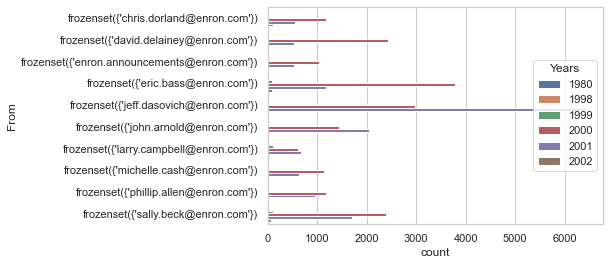

In [12]:
sns.barplot(x='count', y='From', hue='Years', data=sum_by_year)

<br>
c - Personne qui reçoit le plus de mail

In [39]:
import ast


def conversion_string_to_list(x):
    x = ast.literal_eval(x)

    return x

def isNaN(string):
    return string != string

In [40]:
import math

receivers = []
nan = 0
for i in data["To"]:
    if isNaN(i):
        
        nan+=1
    else:
        liste = conversion_string_to_list(i)
        
        for user in liste:
            receivers.append(user)

numpy_receiver = np.unique(np.array(receivers))

counter_receiver = []
counter = 0
No_one = 0
print(numpy_receiver)
for i in numpy_receiver:
    
    for receivers in data['To']:
        if isNaN(receivers):
            nan +=1
        else:
            new_receivers = conversion_string_to_list(receivers)
            for receiver in new_receivers:
    
                if receiver == 'No one':
            
                    No_one += 1
            
                else:
            
                    if(i==receivers):
                        counter += 1
    
        counter_receiver.append(counter)
    
    
print(counter_receiver[0:10])


KeyboardInterrupt: 

<br>
<h3>II - Longueur du contenu en fonction de la temporalité.</h3>

<br></br>
- En fonction de l'heure.

Text(0.5, 1.0, "Longueur du contenu moyen en fonction de l'heure")

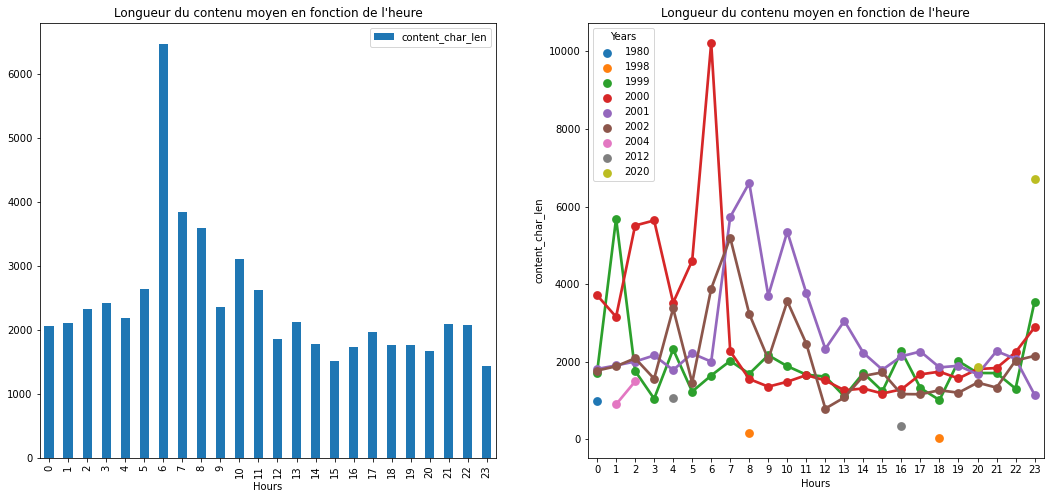

In [8]:
f,ax=plt.subplots(1,2,figsize=(18,8))


data[['content_char_len','Hours']].groupby(['Hours']).mean().plot.bar(ax=ax[0])
ax[0].set_title("Longueur du contenu moyen en fonction de l'heure")

sns.pointplot(x='Hours',y='content_char_len', hue='Years', kind='strip',data=data[['content_char_len','Hours','Years']].groupby(['Years','Hours']).mean().reset_index())
ax[1].set_title("Longueur du contenu moyen en fonction de l'heure")



- En fonction de WeekDay

Text(0.5, 1.0, 'Longueur du contenu moyen en fonction du jour de la semaine')

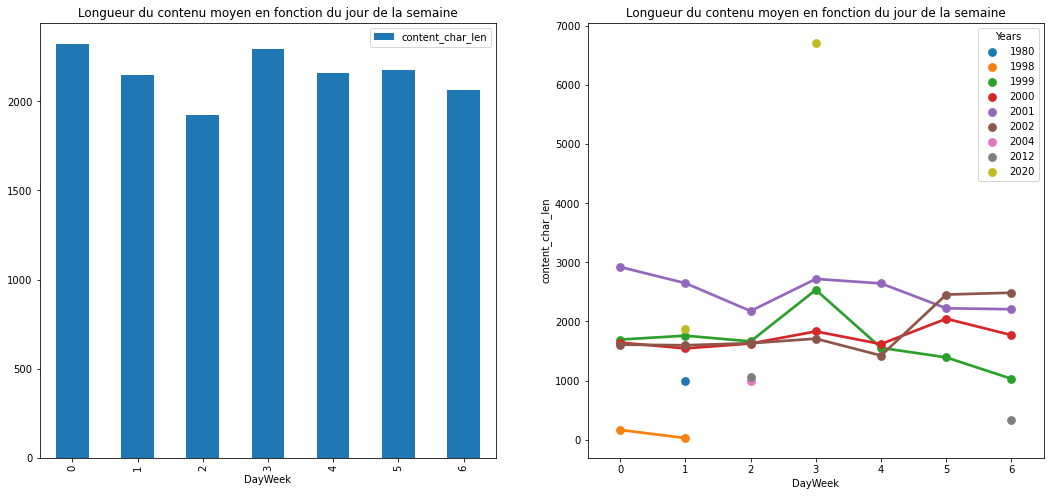

In [9]:
f,ax=plt.subplots(1,2,figsize=(18,8))


data[['content_char_len','DayWeek']].groupby(['DayWeek']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Longueur du contenu moyen en fonction du jour de la semaine')

sns.pointplot(x='DayWeek',y='content_char_len', hue='Years', kind='strip',data=data[['content_char_len','DayWeek','Years']].groupby(['Years','DayWeek']).mean().reset_index())
ax[1].set_title('Longueur du contenu moyen en fonction du jour de la semaine')



<br></br>
- En fonction de month.

Text(0.5, 1.0, 'Longueur du contenu moyen en fonction du mois')

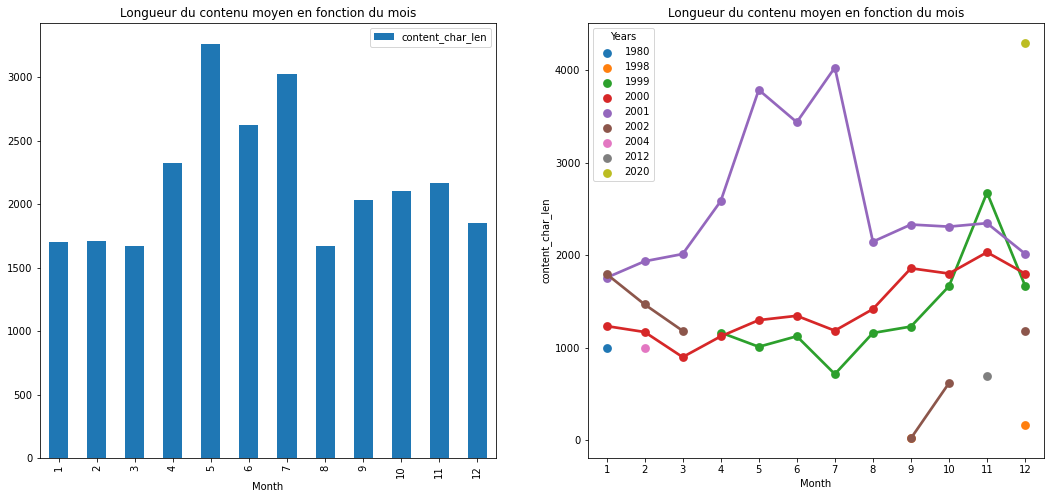

In [10]:
f,ax=plt.subplots(1,2,figsize=(18,8))


data[['content_char_len','Month']].groupby(['Month']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Longueur du contenu moyen en fonction du mois')

sns.pointplot(x='Month',y='content_char_len', hue='Years', kind='strip',data=data[['content_char_len','Years','Month']].groupby(['Month','Years']).mean().reset_index())
ax[1].set_title('Longueur du contenu moyen en fonction du mois')



<br></br>
- En fonction de years.

Text(0.5, 1.0, 'Longueur du contenu moyen en fonction de Years')

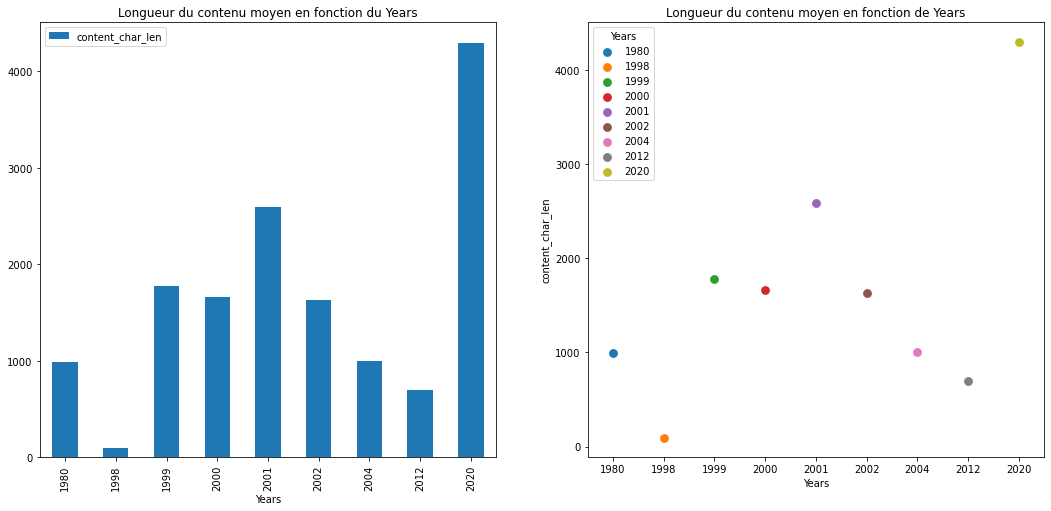

In [47]:
f,ax=plt.subplots(1,2,figsize=(18,8))


data[['content_char_len','Years']].groupby(['Years']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Longueur du contenu moyen en fonction du Years')

sns.pointplot(x='Years',y='content_char_len', hue='Years', kind='strip',data=data[['content_char_len','Years']].groupby(['Years']).mean().reset_index())
ax[1].set_title('Longueur du contenu moyen en fonction de Years')



- <b> Bizarre, il y a des années ou il n'y a qu'un seul mois ou/et un seul jour ou des mails sont envoyés -> à approfondir </b>
- <b>Bizarre la moyenne de longueur des mails de 2020 est bien plus grande que celle des autres années... hors Enron n'est plus en activité</b>

<br>
<h3>III - Longueur du contenu en fonction des gens.</h3>

Text(0.5, 1.0, 'Longueur du contenu moyen en fonction de To_count')

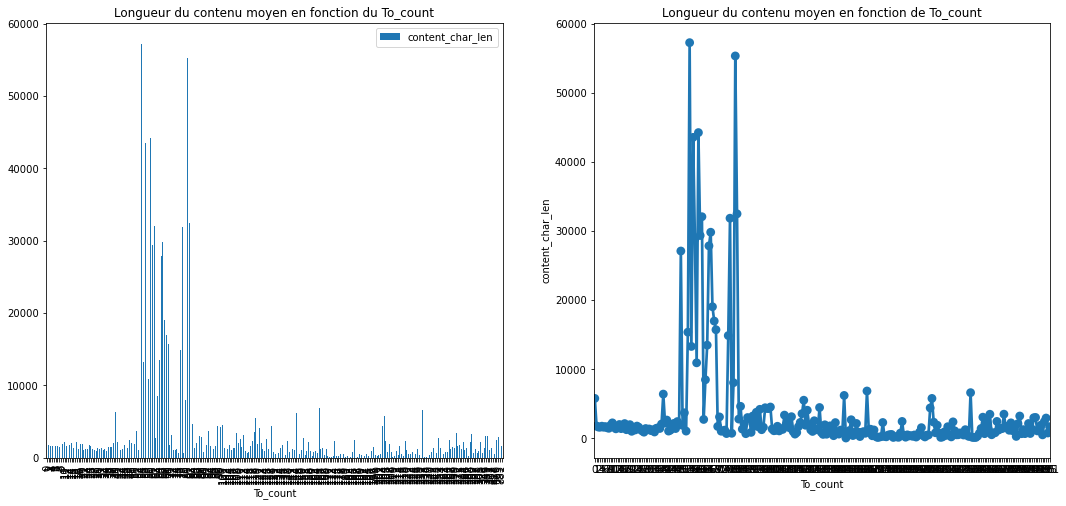

In [12]:
f,ax=plt.subplots(1,2,figsize=(18,8))


data[['content_char_len','To_count']].groupby(['To_count']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Longueur du contenu moyen en fonction du To_count')

sns.pointplot(x='To_count',y='content_char_len', kind='strip',data=data[['content_char_len','To_count']].groupby(['To_count']).mean().reset_index())
ax[1].set_title('Longueur du contenu moyen en fonction de To_count')



<b> FAIRE des categories pour To_count pour une meilleure lisibilité.</b>

<br>
<h3>II - Longueur du contenu en fonction des Cat.</h3>

In [14]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'DayWeek', 'Message-ID', 'Date', 'From',
       'To', 'Subject', 'X-From', 'X-To', 'X-cc', 'X-bcc', 'X-Folder',
       'X-Origin', 'X-FileName', 'content', 'user', 'Cat_1_level_1',
       'Cat_1_level_2', 'Cat_1_weight', 'Cat_2_level_1', 'Cat_2_level_2',
       'Cat_2_weight', 'Cat_3_level_1', 'Cat_3_level_2', 'Cat_3_weight',
       'Cat_4_level_1', 'Cat_4_level_2', 'Cat_4_weight', 'Cat_5_level_1',
       'Cat_5_level_2', 'Cat_5_weight', 'Cat_6_level_1', 'Cat_6_level_2',
       'Cat_6_weight', 'Cat_7_level_1', 'Cat_7_level_2', 'Cat_7_weight',
       'Cat_8_level_1', 'Cat_8_level_2', 'Cat_8_weight', 'Cat_9_level_1',
       'Cat_9_level_2', 'Cat_9_weight', 'Cat_10_level_1', 'Cat_10_level_2',
       'Cat_10_weight', 'labeled', 'Years', 'Month', 'Day', 'Hours',
       'content_char_len', 'content_char_length_category', 'content_word_len',
       'content_word_length_category', 'To_count'],
      dtype='object')

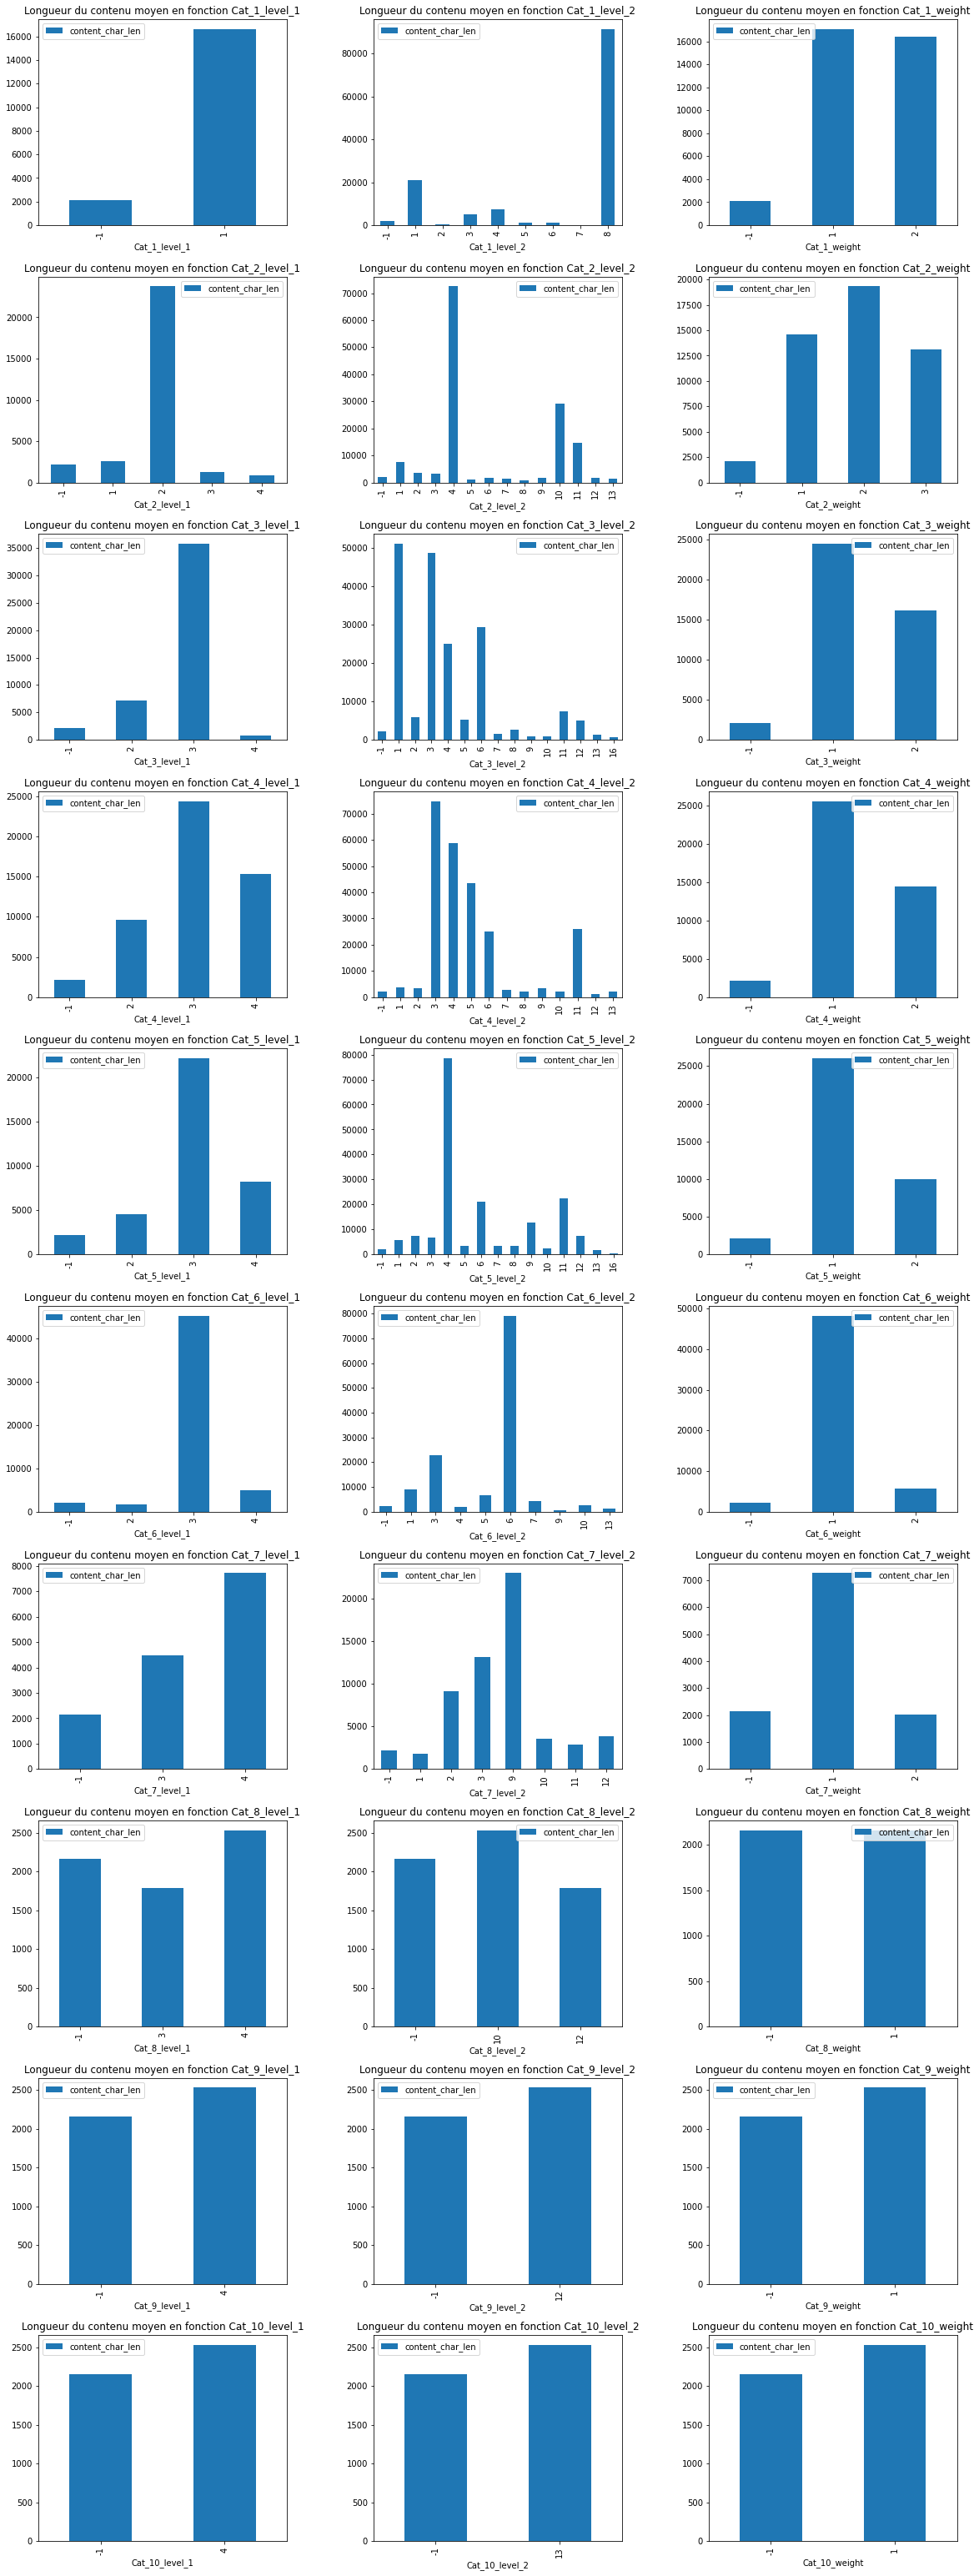

In [46]:
categories = ['Cat_1_level_1',
       'Cat_1_level_2', 'Cat_1_weight', 'Cat_2_level_1', 'Cat_2_level_2',
       'Cat_2_weight', 'Cat_3_level_1', 'Cat_3_level_2', 'Cat_3_weight',
       'Cat_4_level_1', 'Cat_4_level_2', 'Cat_4_weight', 'Cat_5_level_1',
       'Cat_5_level_2', 'Cat_5_weight', 'Cat_6_level_1', 'Cat_6_level_2',
       'Cat_6_weight', 'Cat_7_level_1', 'Cat_7_level_2', 'Cat_7_weight',
       'Cat_8_level_1', 'Cat_8_level_2', 'Cat_8_weight', 'Cat_9_level_1',
       'Cat_9_level_2', 'Cat_9_weight', 'Cat_10_level_1', 'Cat_10_level_2',
       'Cat_10_weight']

f,ax=plt.subplots(10, 3,figsize=(18,50))

j = 0
for i in range(0, 10):
    
    data[['content_char_len', categories[j]]].groupby([categories[j]]).mean().plot.bar(ax=ax[i][0])
    ax[i][0].set_title('Longueur du contenu moyen en fonction '+ categories[j])
    
    data[['content_char_len', categories[j+1]]].groupby([categories[j+1]]).mean().plot.bar(ax=ax[i][1])
    ax[i][1].set_title('Longueur du contenu moyen en fonction '+ categories[j+1])
    
    data[['content_char_len', categories[j+2]]].groupby([categories[j+2]]).mean().plot.bar(ax=ax[i][2])
    ax[i][2].set_title('Longueur du contenu moyen en fonction '+ categories[j+2])
    
    j += 3

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)


